In [1]:
import apgpy as apg
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
n = 300
m = 1000
A = np.random.randn(m, n)
b = np.random.randn(m)
np.linalg.cond(A)

3.3549981390028947

In [3]:
U, s, V = np.linalg.svd(A, full_matrices=True)
S = np.zeros((m, n))
S[:n, :n] = np.diag(s)
S = S**2

A = np.dot(U, np.dot(S, V))
np.linalg.cond(A)


11.256012512712871

In [4]:
AtA = np.dot(A.T, A)
Atb = np.dot(A.T, b)

In [5]:
eps = 1e-10

In [6]:
def quad_grad(y):
    return np.dot(AtA, y) - Atb

iter num 0, norm(Gk)/(1+norm(xk)): nan, step-size: 3.01e-07
iter num 100, norm(Gk)/(1+norm(xk)): 3.87e-01, step-size: 2.37e-07
iter num 200, norm(Gk)/(1+norm(xk)): 4.62e-04, step-size: 1.54e-07
iter num 300, norm(Gk)/(1+norm(xk)): 2.81e-08, step-size: 1.86e-07
iter num 364, norm(Gk)/(1+norm(xk)): 9.57e-11, step-size: 1.99e-07
terminated


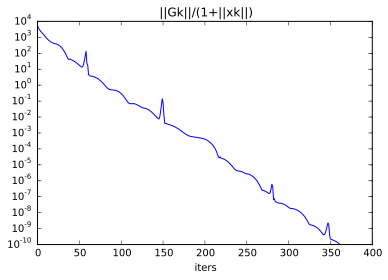

In [7]:
x = apg.solve(quad_grad, {}, n, eps = eps)

iter num 0, norm(Gk)/(1+norm(xk)): nan, step-size: 3.01e-07
iter num 100, norm(Gk)/(1+norm(xk)): 3.89e+01, step-size: 2.54e-07
iter num 200, norm(Gk)/(1+norm(xk)): 1.11e+01, step-size: 2.14e-07
iter num 300, norm(Gk)/(1+norm(xk)): 2.09e+00, step-size: 2.34e-07
iter num 400, norm(Gk)/(1+norm(xk)): 1.28e+00, step-size: 2.41e-07
iter num 500, norm(Gk)/(1+norm(xk)): 9.36e-01, step-size: 1.92e-07
iter num 600, norm(Gk)/(1+norm(xk)): 3.64e-01, step-size: 2.07e-07
iter num 700, norm(Gk)/(1+norm(xk)): 5.83e-02, step-size: 1.99e-07
iter num 800, norm(Gk)/(1+norm(xk)): 9.03e-02, step-size: 2.08e-07
iter num 900, norm(Gk)/(1+norm(xk)): 5.24e-02, step-size: 1.84e-07
iter num 1000, norm(Gk)/(1+norm(xk)): 3.73e-02, step-size: 1.65e-07
iter num 1100, norm(Gk)/(1+norm(xk)): 1.20e-02, step-size: 1.42e-07
iter num 1200, norm(Gk)/(1+norm(xk)): 4.62e-02, step-size: 1.90e-07
iter num 1300, norm(Gk)/(1+norm(xk)): 1.66e-03, step-size: 3.39e-07
iter num 1400, norm(Gk)/(1+norm(xk)): 1.79e-03, step-size: 3.36e-

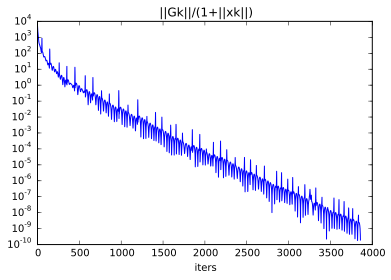

In [8]:
x_no_restart = apg.solve(quad_grad, {}, n, eps = eps, use_restart=False, max_iters=10000)

In [9]:
def cg(A, b, x=False, eps=1e-12, gen_plots=True):
    n = np.shape(A)[0]
    if not x:
        x = np.zeros(n)
    r = b - np.dot(A, x)
    p = np.copy(r)
    rsold = np.linalg.norm(r)**2

    max_iters = 10 * n # cg should only need n steps
    if gen_plots:
        errs = np.zeros(max_iters)
        import matplotlib.pyplot as plt

    k = 0
    for k in range(max_iters):
        Ap = np.dot(A, p)
        alpha = rsold / np.inner(p, Ap)
        x = x + alpha * p
        r = r - alpha * Ap
        rsnew = np.linalg.norm(r)**2
        err = rsnew**0.5 / (1 + np.linalg.norm(x))
        if gen_plots:
            errs[k] = err

        if err < eps:
              break
        p = r + p * (rsnew / rsold)
        rsold=rsnew
        
    if gen_plots:
        errs = errs[1:k]
        plt.semilogy(errs[1:k])
        plt.xlabel('iters')
        plt.title('||rk|| / (1 + ||xk||')

    return x

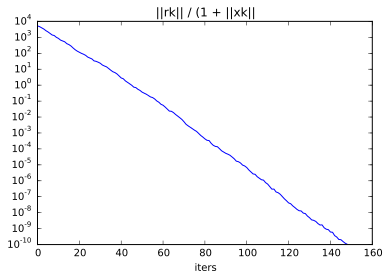

In [10]:
x_cg = cg(AtA, Atb, eps = eps)

In [11]:
np.linalg.norm(x - x_cg) / np.linalg.norm(x_cg)

4.6864821158793881e-14

In [12]:
np.linalg.norm(np.dot(A,x) - b)

27.224901926668114

In [13]:
np.linalg.norm(np.dot(A,x_cg) - b)

27.224901926668114

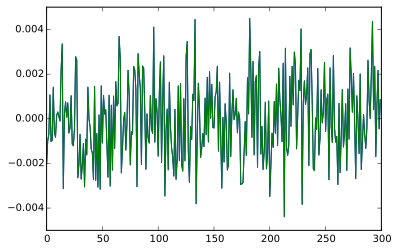

In [14]:
plt.plot(x)
plt.plot(x_cg)